In [1]:
# import the libraries
import requests
import csv
from bs4 import BeautifulSoup

In [2]:
# convert model names to brands

# open the models file and use that to replace model names with brand names. 
# format of file is brand, model
#file = open('models.csv', 'r')
file = open('models.csv', 'r', encoding='mac_roman', newline='')

csv_file = csv.reader(file)

# store the brand names
brands = []
for i in csv_file:
    brands.append(i)
#     parsedData = parsedData.replace(i[1], i[0])

print('Finished storing this csv file into a list')
# close the file
file.close()

Finished storing this csv file into a list


In [3]:
brands

[['acura', 'integra'],
 ['acura', 'Legend†'],
 ['acura', 'vigor'],
 ['acura', 'rlx'],
 ['acura', 'ILX'],
 ['acura', 'MDX'],
 ['acura', 'RDX'],
 ['acura', 'TSX'],
 ['acura', 'RSX'],
 ['audi', 'quattro'],
 ['audi', 'a4'],
 ['audi', 'a6'],
 ['audi', 'a5'],
 ['audi', 'a7'],
 ['audi', 'q3'],
 ['audi', 'q5'],
 ['audi', 'q7'],
 ['audi', 'a8'],
 ['audi', 'a3'],
 ['bmw', '3-series'],
 ['bmw', '5-series'],
 ['bmw', '6-series'],
 ['bmw', '4-series'],
 ['bmw', 'xdrive'],
 ['bmw', 'alpina'],
 ['bmw', '330ci'],
 ['bmw', '328i'],
 ['bmw', '330c'],
 ['bmw', '335i'],
 ['bmw', '335d'],
 ['bmw', '528i'],
 ['bmw', '535i'],
 ['bmw', '128i'],
 ['bmw', '640i'],
 ['bmw', '3er'],
 ['bmw', '5er'],
 ['bmw', 'M5'],
 ['bmw', 'M3'],
 ['bmw', 'M6'],
 ['bmw', 'bmws'],
 ['bmw', 'bmwesque'],
 ['buick', 'park avenue'],
 ['buick', 'la crosse'],
 ['buick', 'lacrosse'],
 ['buick', 'century'],
 ['buick', 'enclave'],
 ['buick', 'encore'],
 ['buick', 'regal'],
 ['buick', 'buicks'],
 ['cadillac', 'escalade'],
 ['cadillac', 'sr

## Scraping all pages

In [4]:
# we'll be using the cars and conversations forum
url = 'https://forums.edmunds.com/discussion/18576/general/x/edmunds-members-cars-conversations'

In [5]:
# number of forum pages
num_pages = 2572

In [6]:
# store the comments in a string
all_comments = ""

# store output: date, userid, message
output_csv = []

# go through each page
for page_number in range(1, 3):
    # first page string of url isn't anything special
    try:
        if(page_number == 1):
            new_url = url
        else:
            # end url format is /p220 etc.
            new_url = url + "/p" + str(page_number)
        print(new_url)
        # collect the url with requests library
        page = requests.get(new_url)
    
        # get the html of the page in string form
        page_html = page.text
    
        # create the BeautifulSoup object that takes in the html in str form and a html/xml
        #parser of choice either html.parser or lxml
        soup = BeautifulSoup(page_html, 'html.parser')
    
        # inspect the elements from the webpage to know where stuff is
        # in this case the comments are under a <p> tag which are all under a <div class = "Message userContent"</div/ tag 
        # which are all under a <div class = "MessageList DataList Comments"> tag
    
        # Pull all text from the 'MessageList DataList Comments' divs
        messagelist = soup.find(class_ = "MessageList DataList Comments")
        
        # within the 'MessageList DataList Comments' divs pull all text from 'Message userContent' divs
        #usermessages = messagelist.find_all(class_ =  "Message userContent")
        usermessages = messagelist.find_all(class_ = "Comment")
        
        # now extract just the <p> tags from all comments! 
        for i in range(len(usermessages)):
            # let's grab the date and username of the post which is under class = "Item-Header CommentHeader"
            # in a <time> tag and class = "Username"
            commentheader = usermessages[i].find(class_ = 'Item-Header CommentHeader')
            
            # grab the date. Format: June 18, 2014  3:53PM is stored in title = ' ' of <time  >
            date_of_post = commentheader.find("time", title = True)
            
            # variable to store date
            date_of_post = date_of_post['title']
            
            # grab the username
            username = commentheader.find(class_ = "Username")
            # variable to store username
            username = username.string
            
            # now grab text under Message userContent
            messageheader = usermessages[i].find(class_ = 'Message userContent')
            
            # a user comment might have multiple <p> tags
            # [s.extract() for s in usermessages[i](class_ = 'UserQuote')]
            [s.extract() for s in messageheader(class_ = 'UserQuote')]
            user_comments = messageheader.find_all('p')
            
            # variable to store user message
            message = ""
            for j in range(len(user_comments)):
                # remove <a>, <img>, <br> tags embedded in <p>
                [s.extract() for s in user_comments[j]('a')]
                [s.extract() for s in user_comments[j]('img')]
                [s.extract() for s in user_comments[j]('br')]

                
                # Let's do some string manipulation 
                # remove the newline characters, '<p>', '</p','said:'  
                # add the users comments to the mega string

                message += user_comments[j].prettify()

            # let's do some string manipulation
            # remove the newline characters, '<p>', '</p','said:'
            message = message.replace('\n', '')
            message = message.replace(r"<p>", "")
            message = message.replace(r"</p>", "")
            message = message.replace(r"</p>", "")
            message = message.replace(r"said:", "")
            message = message.replace(r":", "")
            message = message.lower()
            
            # deal with brand name
            for k in brands:
                message = message.replace(k[1], k[0])

            # add to all_comments
            all_comments += message
            
            # create a tuple with Date, Userid, Message and store into output_csv
            row = date_of_post, username, message
            output_csv.append(row)
            
            # print this if you want to see some output
            # print('username: ' + str(username))
            # print('date: ' + str(date_of_post))
            # print('message: ' + message)
            
        # print some checks
        print('Page ' + str(page_number) + ' complete')
    except:
        print('page ' + str(page_number) + ' failed')
        continue

https://forums.edmunds.com/discussion/18576/general/x/edmunds-members-cars-conversations
Page 1 complete
https://forums.edmunds.com/discussion/18576/general/x/edmunds-members-cars-conversations/p2
Page 2 complete


In [7]:
output_csv[0:2]

[('June 18, 2014  3:53PM',
  'graphicguy',
  " i'm 2nd post....yee haw!!!!!!!! do i get a badge?"),
 ('June 18, 2014  4:01PM',
  'bwia',
  ' great, but will it be possible to refer to old thread? and one more thing how do i find and add a discussion to "my bookmarks?"')]

### Throw output_csv list into a csv file

In [8]:
# throw this into a text file just in case
with open('comments.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['date','username', 'comment'])
    for row in output_csv:
        csv_out.writerow(row)

### Get list of comments

In [9]:
comments = []

In [10]:
for c in output_csv:
    comments.append(c[2])

In [11]:
comments[0]

" i'm 2nd post....yee haw!!!!!!!! do i get a badge?"

In [12]:
tot_number_of_comments = len(comments)

### Get list of unique brands

In [13]:
unique_brands = []
for b in brands:
    if b[0] not in unique_brands:
        unique_brands.append(b[0])

### Get list of tuple of brand combinations

In [14]:
brand_combos = []
for i in range (len(unique_brands)):
    for j in range (len(unique_brands)):
        if j > i:
            brand_combo = (unique_brands[i], unique_brands[j])
            brand_combos.append(brand_combo)

In [16]:
len(brand_combos)

780

In [17]:
len(unique_brands)

40

In [38]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))

In [39]:
X_true

array([[10.,  3.],
       [ 8.,  0.],
       [19., 10.],
       [11.,  9.],
       [10.,  6.],
       [ 0., 12.],
       [ 7., 14.],
       [17.,  2.],
       [ 2.,  1.],
       [19.,  5.],
       [ 8., 14.],
       [ 1., 10.],
       [ 7., 11.],
       [ 1., 15.],
       [16.,  5.],
       [17., 14.],
       [ 0.,  0.],
       [ 9., 18.],
       [ 5.,  7.],
       [ 5., 14.]])

In [40]:
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

In [41]:
similarities

array([[ 0.        ,  3.60555128, 11.40175425,  6.08276253,  3.        ,
        13.45362405, 11.40175425,  7.07106781,  8.24621125,  9.21954446,
        11.18033989, 11.40175425,  8.54400375, 15.        ,  6.32455532,
        13.03840481, 10.44030651, 15.03329638,  6.40312424, 12.08304597],
       [ 3.60555128,  0.        , 14.86606875,  9.48683298,  6.32455532,
        14.4222051 , 14.03566885,  9.21954446,  6.08276253, 12.08304597,
        14.        , 12.20655562, 11.04536102, 16.55294536,  9.43398113,
        16.64331698,  8.        , 18.02775638,  7.61577311, 14.31782106],
       [11.40175425, 14.86606875,  0.        ,  8.06225775,  9.8488578 ,
        19.10497317, 12.64911064,  8.24621125, 19.23538406,  5.        ,
        11.70469991, 18.        , 12.04159458, 18.68154169,  5.83095189,
         4.47213595, 21.47091055, 12.80624847, 14.31782106, 14.56021978],
       [ 6.08276253,  9.48683298,  8.06225775,  0.        ,  3.16227766,
        11.40175425,  6.40312424,  9.21954446, 1

In [50]:
type(similarities)

numpy.ndarray

In [42]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

In [43]:
pos

array([[ -3.5176675 ,  -4.45379698],
       [ -7.11558531,  -4.68814771],
       [  7.51050682,  -7.34861737],
       [  1.85533818,  -1.6023753 ],
       [ -1.13497378,  -2.63096633],
       [ -2.44558443,   8.95707208],
       [  3.39610939,   4.61261453],
       [ -0.05855686, -10.62105013],
       [ -9.96700061,   0.68489511],
       [  3.53939253, -10.38665689],
       [  4.00371566,   3.81837874],
       [ -3.42646988,   6.94761638],
       [  1.01338777,   2.78979126],
       [  0.54475265,   9.98565042],
       [  1.71645301,  -8.00399022],
       [  9.47221411,  -3.32971596],
       [-11.97644536,   1.66580042],
       [  7.78828305,   5.45457682],
       [ -3.37876822,   1.94783243],
       [  2.18089879,   6.20108871]])

In [44]:
# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
#npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

In [45]:
pos = clf.fit_transform(pos)
pos

array([[ 2.85089727,  4.90765462],
       [ 1.74755088,  8.34036885],
       [ 9.59363437, -4.28722354],
       [ 2.17184044, -1.13729624],
       [ 2.03040927,  2.02192939],
       [-9.2296728 , -1.01468167],
       [-3.04326551, -4.85291133],
       [ 9.85780055,  3.9550345 ],
       [-4.29743217,  9.01940611],
       [10.961119  ,  0.52227528],
       [-2.08135431, -5.12640199],
       [-7.72078083,  0.6356715 ],
       [-2.22279462, -1.96716286],
       [-9.08822061, -4.17392599],
       [ 8.07537895,  1.34287448],
       [ 6.57583637, -7.58786705],
       [-5.9477998 , 10.5282806 ],
       [-2.21340733, -9.24755736],
       [-3.05264953,  2.42746546],
       [-4.9670896 , -4.30593278]])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


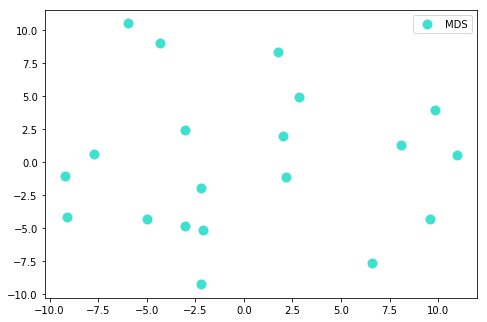

In [49]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
# plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
#             label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
#plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
# segments = [[X_true[i, :], X_true[j, :]]
#             for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
# lc = LineCollection(segments,
#                     zorder=0, cmap=plt.cm.Blues,
#                     norm=plt.Normalize(0, values.max()))
# lc.set_array(similarities.flatten())
# lc.set_linewidths(np.full(len(segments), 0.5))
# ax.add_collection(lc)

plt.show()

In [ ]:
adist = np.array(dists)
amax = np.amax(adist)
adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(cities, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()